In [463]:
#import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

df = pd.read_csv("data\\housing.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD23AA1888>,
      dtype=object)

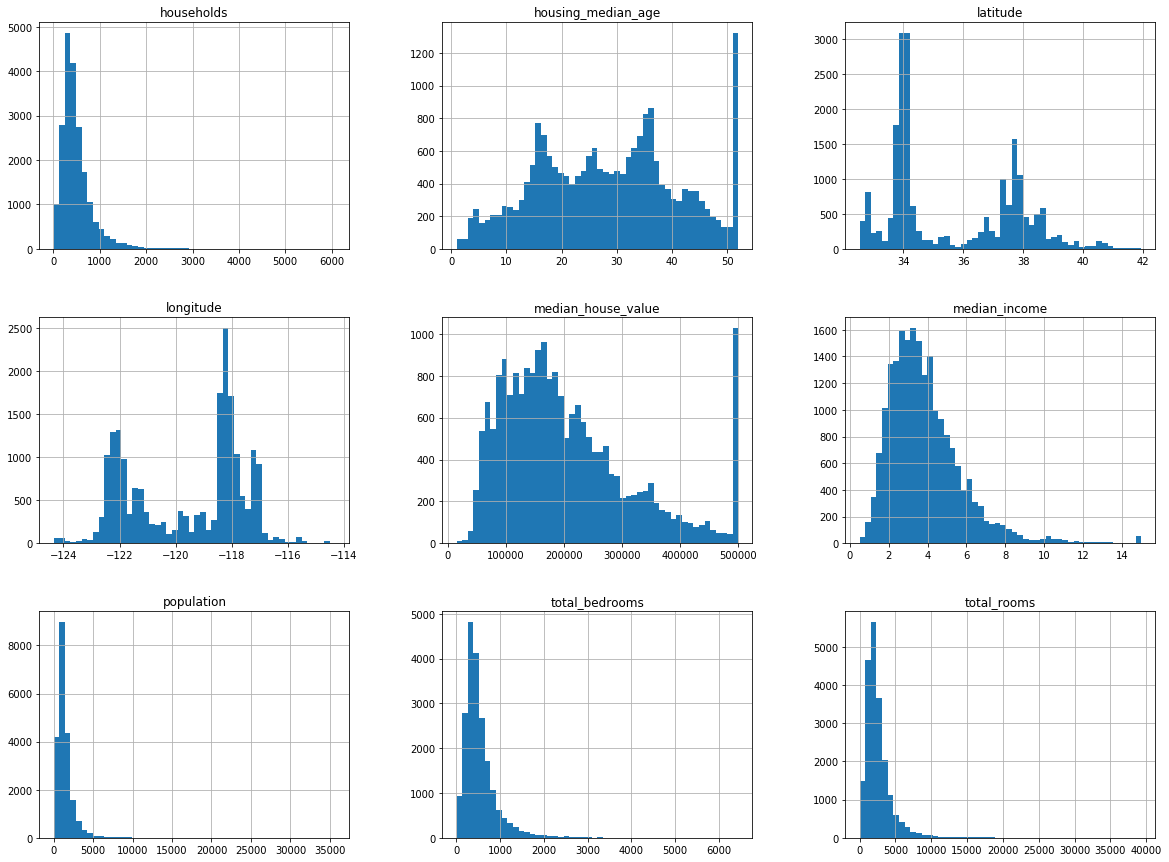

In [464]:
#descriptive stats etc.
# df.shape
# df.columns
# df.head()
# df.info()
# df.describe()
df.hist(bins=50, figsize=(20,15))

In [465]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [466]:
#Some useful data manipulations

import numpy as np

df["id"]=df["longitude"]*1000 + df["latitude"]
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]



#change order of columns
# newColumnsOrder = ['id','longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value', 'ocean_proximity']
# df = df[newColumnsOrder]

#For stratified sampling, we need to create subgroups for our database. For that, we can create subgroup representations based on income.
df["income_cat"]=pd.cut(df["median_income"],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])

In [467]:
#non-stratified none-recommended sampling!
train = df.sample(frac = 0.8, random_state = 543253256)
test = df.drop(train.index)

print(train.shape)
print(test.shape)

(16512, 15)
(4128, 15)


In [468]:
#stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

spltiingIndexGenerator = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2432)
for trainIndex, testIndex in spltiingIndexGenerator.split(df, df["income_cat"]):
    train = df.loc[trainIndex]
    test = df.loc[testIndex]

print(train.shape)
print(test.shape)

(16512, 15)
(4128, 15)


In [469]:
# income_cat column was generated only for stratified sampling and we no longer need it
train = train.drop(columns = ['income_cat'])
test = test.drop(columns = ['income_cat'])
#Note that from now on we are using train dataset, and only at the every end for testing the ML model, we will be needing the test datset.

In [470]:
# train.to_csv("MyTrainDataSet.csv")

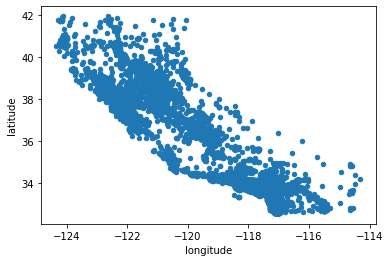

In [471]:
train.plot(kind="scatter", x="longitude", y='latitude')

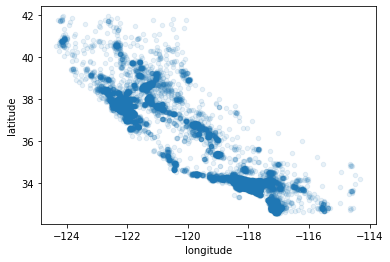

In [472]:
train.plot(kind="scatter", x="longitude", y='latitude', alpha=0.1)

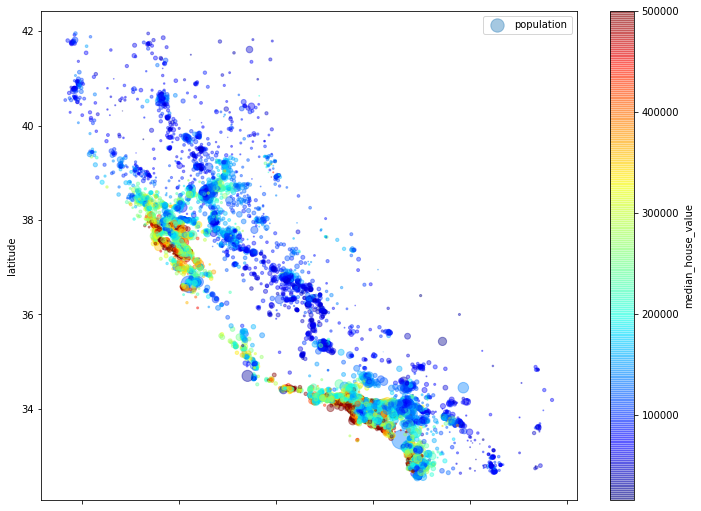

In [473]:
import matplotlib.pyplot as plt 

train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, label="population", figsize=(12,9),
           s=train['population']/100, c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD1C7EC108>,
      dtype=object)

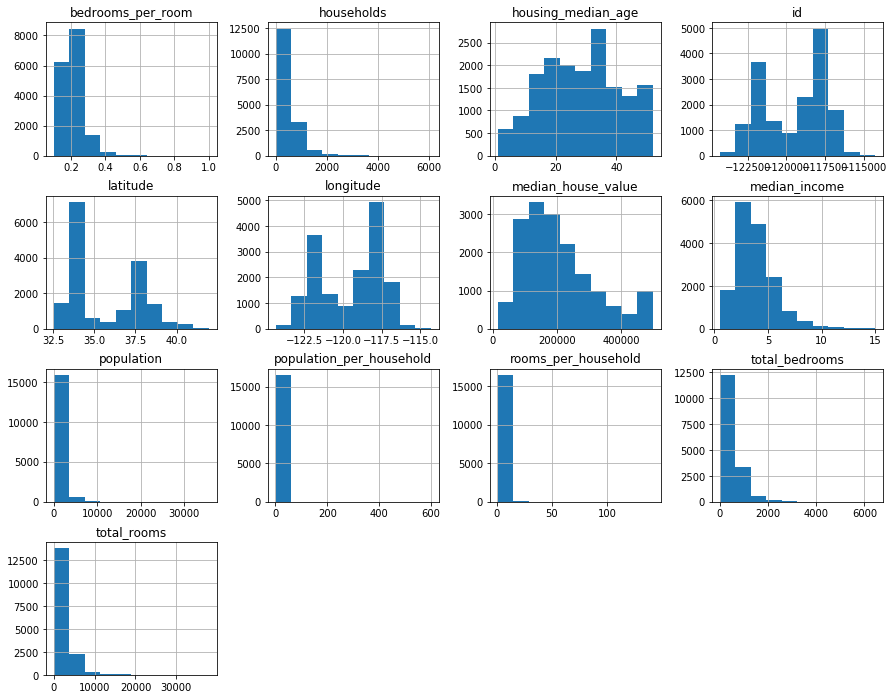

In [474]:
train.hist(figsize=(15,12))

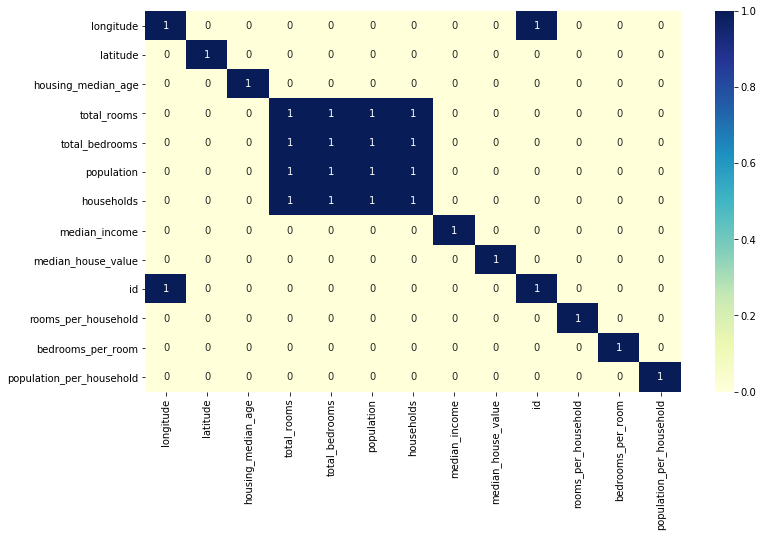

In [475]:
import seaborn as sb

corrMatrix = train.corr()
plt.figure(figsize = (12,7))
datapltot = sb.heatmap(abs(corrMatrix > 0.75), cmap='YlGnBu', annot = True)
plt.show()

In [476]:
abs(corrMatrix['median_house_value']).sort_values()

population                  0.022762
population_per_household    0.048871
longitude                   0.053009
id                          0.053209
total_bedrooms              0.053883
households                  0.069639
housing_median_age          0.103213
latitude                    0.138033
total_rooms                 0.140187
rooms_per_household         0.172741
bedrooms_per_room           0.258594
median_income               0.689111
median_house_value          1.000000
Name: median_house_value, dtype: float64

In [477]:
#To see if we have missing data in the data frame
np.where(pd.isnull(train))

(array([   50,    50,    57,    57,   244,   244,   367,   367,   395,
          395,   697,   697,   728,   728,   918,   918,   961,   961,
         1266,  1266,  1485,  1485,  1504,  1504,  1786,  1786,  2080,
         2080,  2158,  2158,  2188,  2188,  2241,  2241,  2325,  2325,
         2655,  2655,  2747,  2747,  2959,  2959,  2962,  2962,  2977,
         2977,  3106,  3106,  3113,  3113,  3489,  3489,  3599,  3599,
         3690,  3690,  3713,  3713,  3724,  3724,  3861,  3861,  4082,
         4082,  4144,  4144,  4230,  4230,  4289,  4289,  4479,  4479,
         4556,  4556,  4653,  4653,  4668,  4668,  4692,  4692,  4714,
         4714,  4743,  4743,  4844,  4844,  4849,  4849,  4860,  4860,
         5099,  5099,  5208,  5208,  5380,  5380,  5386,  5386,  5388,
         5388,  5395,  5395,  5423,  5423,  5440,  5440,  5446,  5446,
         5609,  5609,  5796,  5796,  5873,  5873,  5936,  5936,  6033,
         6033,  6292,  6292,  6342,  6342,  6587,  6587,  6591,  6591,
      

In [478]:
train = train.dropna()
np.where(pd.isnull(train))

(array([], dtype=int64), array([], dtype=int64))

In [479]:
train = train.reset_index(drop = True)

In [480]:
from sklearn.preprocessing import OneHotEncoder
dataEncoder = OneHotEncoder()
oceanProximityDataEncoded = dataEncoder.fit_transform(train[['ocean_proximity']])
oceanProximityDataEncoded = oceanProximityDataEncoded.toarray() #the output was a sparse matrix. We change it to a dense matrix for easy manipulations.
catDataDF = pd.DataFrame(oceanProximityDataEncoded) #create a pandas dataframe from numpy array because we want the data to be in dataframe so that it can work well with the rest of train dataset

In [481]:
catDataDF

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16347,0.0,0.0,0.0,0.0,1.0
16348,1.0,0.0,0.0,0.0,0.0
16349,1.0,0.0,0.0,0.0,0.0
16350,0.0,0.0,0.0,0.0,1.0


In [482]:
dataEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [483]:
y = train['median_house_value']

In [484]:
#Creating numerical data
# selectedCols = ['latitude','housing_median_age','total_rooms','median_income']
selectedCols = ['median_income', 'bedrooms_per_room','rooms_per_household','total_rooms','latitude']
numDataDF = train[selectedCols]

#standardizing the numerical data
numDataDF = (numDataDF-numDataDF.mean())/numDataDF.std()

In [485]:
#Creating X data for .fit(X,y) - merging numerical and categorical data
X = numDataDF.join(catDataDF)

In [486]:
from sklearn.linear_model import LinearRegression

mdl = LinearRegression()
mdl.fit(X,y)  # this runs an optimization problem to create F in y = F(x1,x2,...,xn)
mdl.coef_

array([  80391.41256062,   18659.19094602,    4350.67022752,
          3738.31846513,    2560.41395559,  -31479.06458927,
       -102199.04850076,  157111.15214298,  -12054.53381174,
        -11378.50524122])

In [487]:
# evaluate how well the linear regressor learned the train data

from sklearn.metrics import mean_squared_error 
predictions = mdl.predict(X) 
mse = mean_squared_error(y, predictions)
np.sqrt(mse)

72285.35425372382

In [488]:
test = test.dropna()
test = test.reset_index(drop=True)
temp = dataEncoder.transform(test[['ocean_proximity']])
catDataDFTest = pd.DataFrame(temp.toarray())
numDataDFTest = test[selectedCols]
numDataDFTest = (numDataDFTest-numDataDF.mean())/numDataDF.std() 
XTest = numDataDFTest.join(catDataDFTest)

predictionsTest = mdl.predict(XTest) 
yTest = test['median_house_value']
mseTest = mean_squared_error(yTest, predictionsTest)
np.sqrt(mseTest)

13492035.62279674

In [489]:
XTest

,median_income,bedrooms_per_room,rooms_per_household,total_rooms,latitude,0,1,2,3,4
0,3.4875,0.190383,5.199187,2558.0,32.69,0.0,0.0,0.0,0.0,1.0
1,3.2917,0.247135,4.308642,2792.0,33.77,0.0,0.0,0.0,0.0,1.0
2,3.4286,0.227860,4.250980,1084.0,34.07,1.0,0.0,0.0,0.0,0.0
3,2.6786,0.217409,5.008264,2424.0,34.31,1.0,0.0,0.0,0.0,0.0
4,1.3571,0.324974,9.144208,3868.0,34.20,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4076,1.9667,0.279503,5.715976,966.0,34.42,1.0,0.0,0.0,0.0,0.0
4077,1.4940,0.625887,1.768025,564.0,34.06,1.0,0.0,0.0,0.0,0.0
4078,2.3913,0.318221,3.875000,1147.0,34.08,1.0,0.0,0.0,0.0,0.0
4079,3.2917,0.166102,6.597444,2065.0,36.55,0.0,1.0,0.0,0.0,0.0


In [491]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X, y)
treePredictions = tree_reg.predict(X)
tree_mse = mean_squared_error(y, treePredictions)
np.sqrt(tree_mse)

array([ 82200., 271400., 196100., ..., 152600., 152700., 264700.])

In [502]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X, y,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [87077.13060763 86476.79871758 85298.90879871 87944.24685929
 87405.33999066 84437.184534   87819.77779402 80312.16213445
 87634.44812484 90495.01091786]
Mean: 86490.10084790419
Standard deviation: 2573.2118251959623


In [503]:
scores = cross_val_score(mdl, X, y,scoring="neg_mean_squared_error", cv=10)
mdl_rmse_scores = np.sqrt(-scores)
display_scores(mdl_rmse_scores)

Scores: [73310.3153069  73500.05909219 73359.30855487 71458.82396161
 71423.27601401 70590.7039882  73024.40313262 68961.84024611
 74896.16394387 72752.44215256]
Mean: 72327.73363929507
Standard deviation: 1630.5237933898566


In [507]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X,y)
scores = cross_val_score(forest_reg, X, y,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [62996.35014539 63356.38393317 61267.71465309 60970.63973141
 61997.25114602 61641.81826219 64271.61341724 59061.83395559
 63292.54870329 63651.19793146]
Mean: 62250.73518788397
Standard deviation: 1487.216182283796


In [508]:
import joblib
joblib.dump(forest_reg, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")

In [509]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [521]:
final_model = grid_search.best_estimator_

In [513]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

74102.34450014791 {'max_features': 2, 'n_estimators': 3}
65371.9774489386 {'max_features': 2, 'n_estimators': 10}
63444.59325115136 {'max_features': 2, 'n_estimators': 30}
72427.43195604734 {'max_features': 4, 'n_estimators': 3}
65355.742871144765 {'max_features': 4, 'n_estimators': 10}
62902.15429196359 {'max_features': 4, 'n_estimators': 30}
71499.62637718227 {'max_features': 6, 'n_estimators': 3}
65094.82239064673 {'max_features': 6, 'n_estimators': 10}
63111.02732926241 {'max_features': 6, 'n_estimators': 30}
71982.80994348953 {'max_features': 8, 'n_estimators': 3}
65545.67717192721 {'max_features': 8, 'n_estimators': 10}
63069.76671687147 {'max_features': 8, 'n_estimators': 30}
73306.67125020736 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
65547.31492161988 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
72431.80189917091 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
64842.801195976994 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [518]:
min(np.sqrt(-cvres['mean_test_score']))

62902.15429196359

In [522]:
predictionsTest = final_model.predict(XTest) 
yTest = test['median_house_value']
mseTest = mean_squared_error(yTest, predictionsTest)
np.sqrt(mseTest)

174290.2529231091